# Median House Sale Prices forecast in New London

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('New London.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,187074.96,236506.76,New London
1,2001-02-01,205326.17,247620.67,New London
2,2001-03-01,194679.63,239516.02,New London
3,2001-04-01,210649.44,244959.93,New London
4,2001-05-01,197721.50,242496.98,New London


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,187074.96,236506.76
1,2001-02-01,205326.17,247620.67
2,2001-03-01,194679.63,239516.02
3,2001-04-01,210649.44,244959.93
4,2001-05-01,197721.50,242496.98


Extracting only Median Sale Price as a dataframe by removing Average Sale Price feature

In [34]:
median_data=data_frame.drop(['Average Sale Price'],axis=1)

## Forecasting median_data

In [35]:
median_data.head()

,Date,Median Sale Price
0,2001-01-01,187074.96
1,2001-02-01,205326.17
2,2001-03-01,194679.63
3,2001-04-01,210649.44
4,2001-05-01,197721.50


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
median_data.columns=['ds','y']

In [37]:
median_data

,ds,y
0,2001-01-01,187074.96
1,2001-02-01,205326.17
2,2001-03-01,194679.63
3,2001-04-01,210649.44
4,2001-05-01,197721.50
...,...,...
245,2021-06-01,280000.00
246,2021-07-01,275000.00
247,2021-08-01,285000.00
248,2021-09-01,268500.00


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(median_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,283866.416885,264208.084755,301182.084399
270,2023-06-30,289333.459230,269917.138720,307374.392001
271,2023-07-31,305453.211262,286420.954976,323811.480714
272,2023-08-31,277987.955566,259528.468518,297540.390917
273,2023-09-30,256687.386398,237428.004352,276528.568024


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,189603.881237,154583.627057,187988.740073,189603.881237,189603.881237,-17186.299922,-17186.299922,-17186.299922,-17186.299922,-17186.299922,-17186.299922,0.0,0.0,0.0,172417.581315
1,2001-02-01,191843.779083,165239.728182,198644.978018,191843.779083,191843.779083,-9851.212933,-9851.212933,-9851.212933,-9851.212933,-9851.212933,-9851.212933,0.0,0.0,0.0,181992.566150
2,2001-03-01,193866.912622,166300.421153,200839.566836,193866.912622,193866.912622,-10363.826142,-10363.826142,-10363.826142,-10363.826142,-10363.826142,-10363.826142,0.0,0.0,0.0,183503.086480
3,2001-04-01,196106.810468,175914.593255,210910.108621,196106.810468,196106.810468,-2954.157674,-2954.157674,-2954.157674,-2954.157674,-2954.157674,-2954.157674,0.0,0.0,0.0,193152.652794
4,2001-05-01,198274.453545,189769.208308,222755.774000,198274.453545,198274.453545,6986.032986,6986.032986,6986.032986,6986.032986,6986.032986,6986.032986,0.0,0.0,0.0,205260.486531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,272955.467781,264208.084755,301182.084399,266861.254042,278699.974768,10910.949104,10910.949104,10910.949104,10910.949104,10910.949104,10910.949104,0.0,0.0,0.0,283866.416885
270,2023-06-30,273818.014577,269917.138720,307374.392001,267058.291375,279883.837517,15515.444652,15515.444652,15515.444652,15515.444652,15515.444652,15515.444652,0.0,0.0,0.0,289333.459230
271,2023-07-31,274709.312933,286420.954976,323811.480714,267489.722802,281047.595567,30743.898328,30743.898328,30743.898328,30743.898328,30743.898328,30743.898328,0.0,0.0,0.0,305453.211262
272,2023-08-31,275600.611289,259528.468518,297540.390917,267594.322441,282598.700617,2387.344277,2387.344277,2387.344277,2387.344277,2387.344277,2387.344277,0.0,0.0,0.0,277987.955566


## Plotting the forecast data

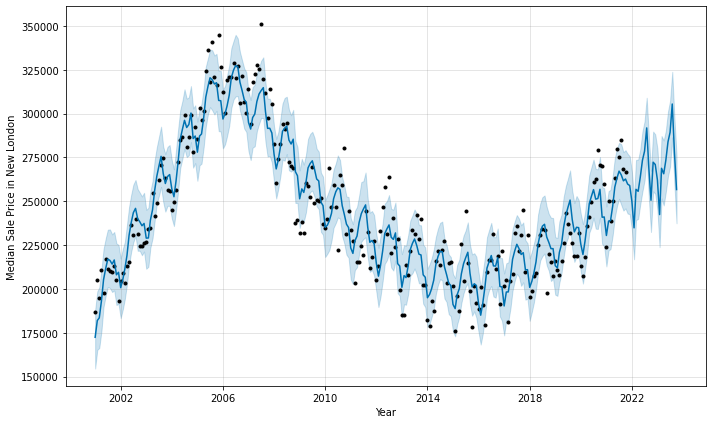

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

## Plotting components of forecast data

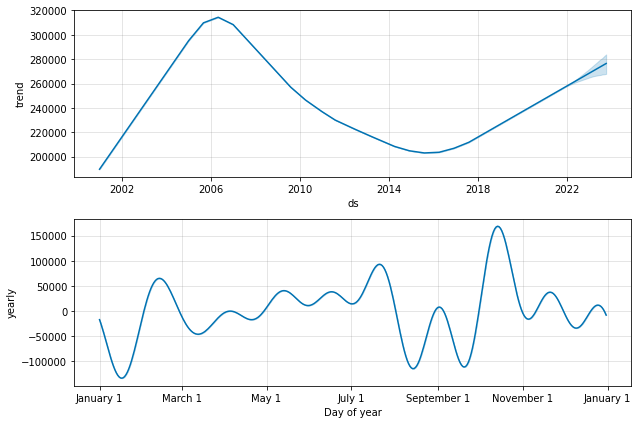

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,2.203376e+08,14843.772395,12116.929410,0.048311,0.039736,0.049161,0.500000
1,40 days,2.551715e+08,15974.088384,12866.129600,0.051476,0.039736,0.052649,0.500000
2,42 days,2.689364e+08,16399.279126,13313.856260,0.053437,0.041111,0.054746,0.477273
3,44 days,2.940226e+08,17147.087377,13849.808235,0.054965,0.042911,0.056064,0.465909
4,45 days,3.202111e+08,17894.443941,14553.860802,0.057757,0.045726,0.059001,0.454545


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.95168856604754%
Horizon: 40 days 00:00:00, Accuracy: 99.94852369602623%
Horizon: 42 days 00:00:00, Accuracy: 99.94656276578466%
Horizon: 44 days 00:00:00, Accuracy: 99.94503467547774%
Horizon: 45 days 00:00:00, Accuracy: 99.94224302356024%
Horizon: 46 days 00:00:00, Accuracy: 99.93930597926449%
Horizon: 47 days 00:00:00, Accuracy: 99.93861178619628%
Horizon: 49 days 00:00:00, Accuracy: 99.93825201208631%
Horizon: 50 days 00:00:00, Accuracy: 99.93893773474056%
Horizon: 51 days 00:00:00, Accuracy: 99.9387704606924%
Horizon: 52 days 00:00:00, Accuracy: 99.9378461367015%
Horizon: 54 days 00:00:00, Accuracy: 99.93563815396345%
Horizon: 55 days 00:00:00, Accuracy: 99.93508136931926%
Horizon: 56 days 00:00:00, Accuracy: 99.93288534312015%
Horizon: 58 days 00:00:00, Accuracy: 99.93270003736738%
Horizon: 60 days 00:00:00, Accuracy: 99.93033263263156%
Horizon: 61 days 00:00:00, Accuracy: 99.92562520824025%
Horizon: 62 days 00:00:00, Accuracy: 99.9269373408

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

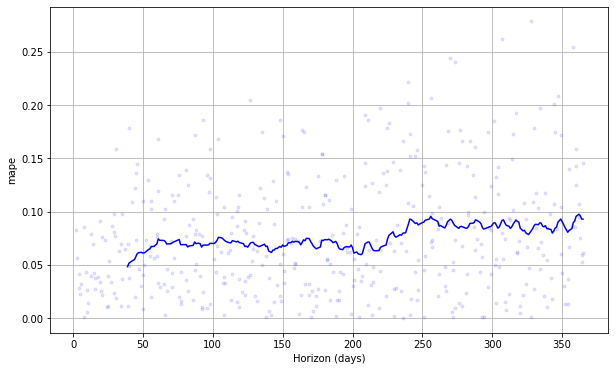

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 30-40.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_median_sale_price.pkl','wb') as file:
    pickle.dump(m,file)